In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

In [ ]:
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label_num'], test_size=0.2, random_state=42)


In [ ]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_pred = nb_model.predict(X_test_vec)
nb_acc = accuracy_score(y_test, nb_pred)


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_vec, y_train)
knn_pred = knn_model.predict(X_test_vec)
knn_acc = accuracy_score(y_test, knn_pred)



In [ ]:
print(f"Naive Bayes Accuracy: {nb_acc:.4f}")
print(f"KNN Accuracy: {knn_acc:.4f}")
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, nb_pred))
print("\nKNN Classification Report:\n", classification_report(y_test, knn_pred))


Naive Bayes Accuracy: 0.9919
KNN Accuracy: 0.9256

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       966
           1       1.00      0.44      0.61       149

    accuracy                           0.93      1115
   macro avg       0.96      0.72      0.79      1115
weighted avg       0.93      0.93      0.91      1115



In [ ]:
sample_emails = [
    "You have WON 1 crore! Claim now by sending bank details",  # Spam
    "Reminder: Your electricity bill is due tomorrow",           # Not Spam
    "Congratulations! You've been selected for a free iPhone",   # Spam
    "Meeting agenda for tomorrow's project discussion",          # Not Spam
    "Urgent: Update your account information to avoid suspension", # Spam
    "Hi Mom, just checking in. Hope you're well!",               # Not Spam
    "Get rich quick with this one-time opportunity",             # Spam
    "Your Amazon order has been shipped",                        # Not Spam
]

# Transform and predict (using Naive Bayes)
sample_vecs = vectorizer.transform(sample_emails)
nb_predictions = nb_model.predict(sample_vecs)

# Display predictions
print("\n--- Naive Bayes Predictions on Sample Emails ---")
for email, prediction in zip(sample_emails, nb_predictions):
    print(f"\nEmail: {email}")
    print("Prediction:", "Spam" if prediction else "Not Spam")





--- Naive Bayes Predictions on Sample Emails ---

Email: You have WON 1 crore! Claim now by sending bank details
Prediction: Spam

Email: Reminder: Your electricity bill is due tomorrow
Prediction: Not Spam

Email: Congratulations! You've been selected for a free iPhone
Prediction: Spam

Email: Meeting agenda for tomorrow's project discussion
Prediction: Not Spam

Email: Urgent: Update your account information to avoid suspension
Prediction: Spam

Email: Hi Mom, just checking in. Hope you're well!
Prediction: Not Spam

Email: Get rich quick with this one-time opportunity
Prediction: Not Spam

Email: Your Amazon order has been shipped
Prediction: Spam


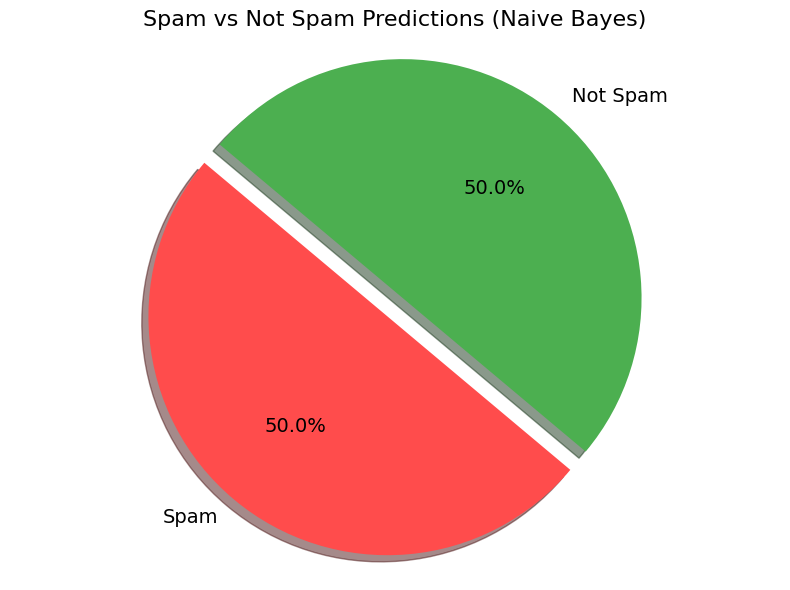

In [ ]:
import matplotlib.pyplot as plt

# Count predictions
spam_count = sum(nb_predictions)
not_spam_count = len(nb_predictions) - spam_count

# Data for pie chart
labels = ['Spam', 'Not Spam']
sizes = [spam_count, not_spam_count]
colors = ['#ff4c4c', '#4caf50']
explode = (0.1, 0)  # highlight spam

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140, textprops={'fontsize': 14})
plt.title("Spam vs Not Spam Predictions (Naive Bayes)", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.tight_layout()
plt.show()

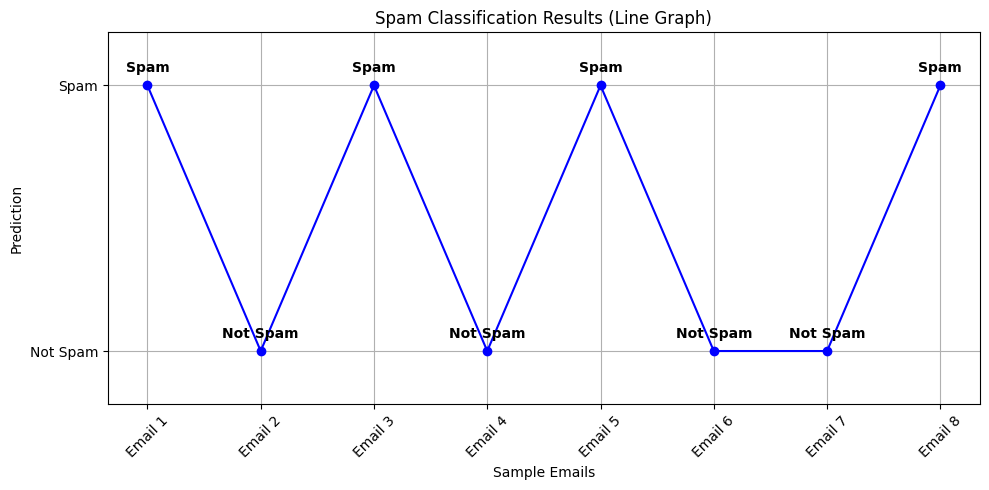

In [ ]:
import matplotlib.pyplot as plt

# Prepare data
labels = ["Spam" if pred else "Not Spam" for pred in predictions]
binary_predictions = [1 if label == "Spam" else 0 for label in labels]

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(binary_predictions) + 1), binary_predictions, marker='o', linestyle='-', color='blue')

# Add labels and titles
plt.xticks(range(1, len(binary_predictions) + 1), [f"Email {i}" for i in range(1, len(binary_predictions) + 1)], rotation=45)
plt.yticks([0, 1], ["Not Spam", "Spam"])
plt.xlabel("Sample Emails")
plt.ylabel("Prediction")
plt.title("Spam Classification Results (Line Graph)")

# Annotate each point
for i, label in enumerate(labels):
    plt.text(i + 1, binary_predictions[i] + 0.05, label, ha='center', fontweight='bold')

plt.ylim(-0.2, 1.2)
plt.grid(True)
plt.tight_layout()
plt.show()


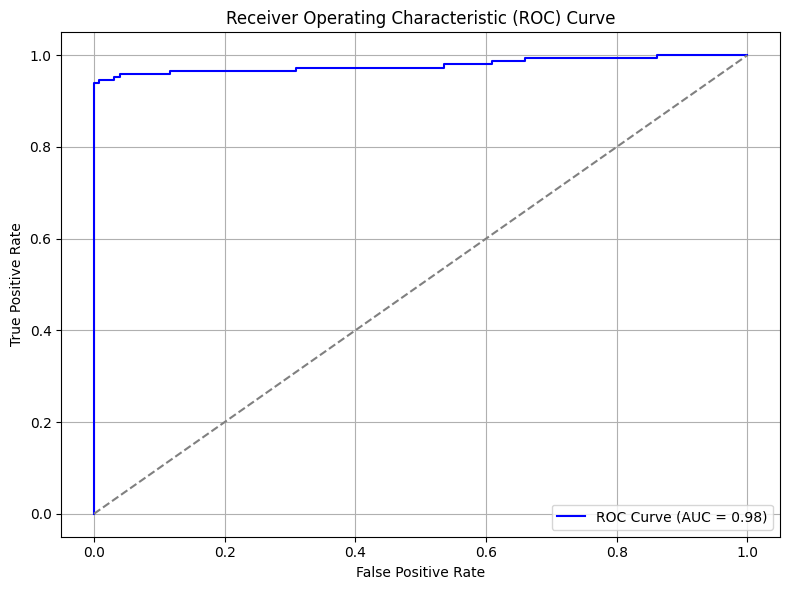

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities instead of class labels
y_probs = model.predict_proba(X_test_vec)[:, 1]  # Probabilities for the "spam" class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random chance)

# Labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
